In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import warnings
import plotly.express as px

In [ ]:
# Load the data
df = pd.read_csv('elonmusk.csv')

In [ ]:
n = len(pd.unique(df['label']))
n


KeyError: 'label'

In [ ]:
# Display the first few rows of the dataframe
print(df.head())


                    id  user_name user_location           user_description  \
0  1544379368478212100  Elon Musk           NaN  Mars & Cars, Chips & Dips   
1  1544377493263720450  Elon Musk           NaN  Mars & Cars, Chips & Dips   
2  1544377130590552064  Elon Musk           NaN  Mars & Cars, Chips & Dips   
3  1544375575724400645  Elon Musk           NaN  Mars & Cars, Chips & Dips   
4  1544375148605853699  Elon Musk           NaN  Mars & Cars, Chips & Dips   

                user_created  user_followers  user_friends  user_favourites  \
0  2009-06-02 20:12:29+00:00       101240855           115            13503   
1  2009-06-02 20:12:29+00:00       101240806           115            13503   
2  2009-06-02 20:12:29+00:00       101240806           115            13503   
3  2009-06-02 20:12:29+00:00       101240806           115            13503   
4  2009-06-02 20:12:29+00:00       101240806           115            13503   

   user_verified                       date  \
0        

In [ ]:
# Check the datatype info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5904 entries, 0 to 5903
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5904 non-null   int64 
 1   user_name         5904 non-null   object
 2   user_location     1050 non-null   object
 3   user_description  1422 non-null   object
 4   user_created      5904 non-null   object
 5   user_followers    5904 non-null   int64 
 6   user_friends      5904 non-null   int64 
 7   user_favourites   5904 non-null   int64 
 8   user_verified     5904 non-null   bool  
 9   date              5904 non-null   object
 10  text              5904 non-null   object
 11  hashtags          2 non-null      object
 12  source            5904 non-null   object
 13  retweets          5904 non-null   int64 
 14  favorites         5904 non-null   int64 
 15  is_retweet        5904 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 657.4+ KB
None

In [ ]:
# Remove pattern function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False


In [ ]:
# Remove Twitter handles (@user)
df['clean_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,clean_text
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False,I find the gold toe sock – inevitably off kil...
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False,"Sock Con, the conference for socks"
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False,Always something new for the magazine cover an...
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False,This guy gets it
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False,Sock tech is so advanced that you can get pret...


In [ ]:
# Remove special characters, numbers, and punctuations
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")


<ipython-input-11-58c61ae0abe4>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,clean_text
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False,I find the gold toe sock inevitably off kil...
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False,Sock Con the conference for socks
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False,Always something new for the magazine cover an...
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False,This guy gets it
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False,Sock tech is so advanced that you can get pret...


In [ ]:
# Remove short words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

In [ ]:
# Tokenize the text # individual words considered as tokens
tokenized_text = df['clean_text'].apply(lambda x: x.split())
tokenized_text.head()


0    [find, gold, sock, inevit, kilter, wash, littl...
1                                 [sock, confer, sock]
2    [alway, someth, magazin, cover, articl, practi...
3                                           [thi, get]
4    [sock, tech, advanc, that, pretti, much, anyth...
Name: clean_text, dtype: object

In [ ]:
# Stem the words
stemmer = PorterStemmer()
tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_text.head()

0    [find, gold, sock, inevit, kilter, wash, littl...
1                                 [sock, confer, sock]
2    [alway, someth, magazin, cover, articl, practi...
3                                           [thi, get]
4    [sock, tech, advanc, that, pretti, much, anyth...
Name: clean_text, dtype: object

In [ ]:
# Word count function
def word_count(text):
    words = text.split()
    return len(words)

# Apply word count function to each text
df['word_count'] = df['clean_text'].apply(word_count)


In [ ]:
# Print word count for each text
print(df['word_count'])


0       11
1        3
2        8
3        2
4       11
        ..
5899     1
5900     5
5901     1
5902     3
5903     4
Name: word_count, Length: 5904, dtype: int64


In [ ]:
# Combine words into a single sentence
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])

df['clean_text'] = tokenized_text
df.head()


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,clean_text
0,1544379368478212100,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240855,115,13503,True,2022-07-05 17:55:09+00:00,@BillyM2k I find the gold toe sock – inevitabl...,NaN,Twitter for iPhone,335,6542,False,find gold sock inevit kilter wash littl troubl...
1,1544377493263720450,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:47:42+00:00,"Sock Con, the conference for socks",NaN,Twitter for iPhone,1451,30753,False,sock confer sock
2,1544377130590552064,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:46:15+00:00,Always something new for the magazine cover an...,NaN,Twitter for iPhone,1284,28610,False,alway someth magazin cover articl practic writ...
3,1544375575724400645,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:40:05+00:00,@ExplainThisBob This guy gets it,NaN,Twitter for iPhone,131,3640,False,thi get
4,1544375148605853699,Elon Musk,NaN,"Mars & Cars, Chips & Dips",2009-06-02 20:12:29+00:00,101240806,115,13503,True,2022-07-05 17:38:23+00:00,Sock tech is so advanced that you can get pret...,NaN,Twitter for iPhone,1191,23790,False,sock tech advanc that pretti much anyth sock f...


**Exploratory Data Analysis**

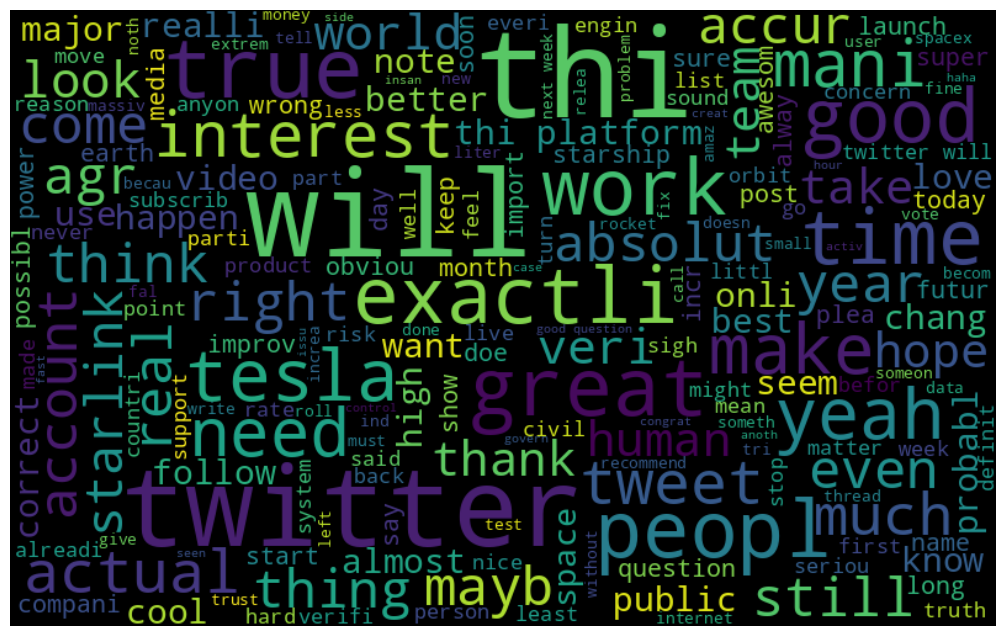

In [ ]:
# Visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


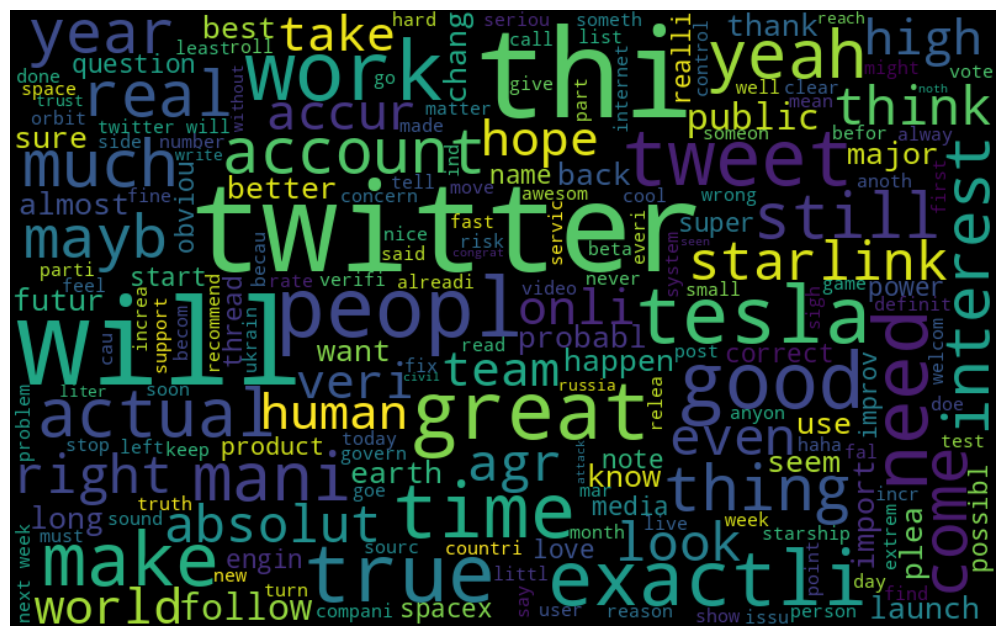

In [ ]:
# Frequent words visualization for positive sentiment
all_words_positive = " ".join([sentence for sentence in df['clean_text'][df['user_verified']==True]])

wordcloud_positive = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_positive)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()


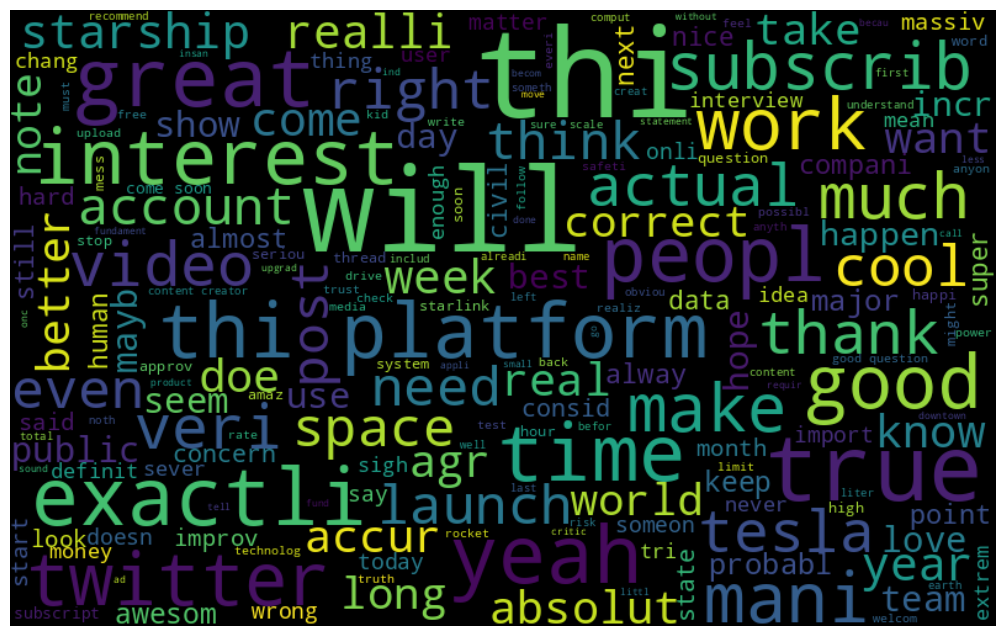

In [ ]:
# Frequent words visualization for negative sentiment
all_words_negative = " ".join([sentence for sentence in df['clean_text'][df['user_verified']==False]])

wordcloud_negative = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_negative)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# Defined a function to extract hashtags based on sentiment keywords
def hashtag_extract_sentiment(text, sentiment):
    hashtags = []
    for index, tweet in enumerate(text):
        # Check if the tweet contains keywords indicating the specified sentiment
        if sentiment in tweet.lower():
            ht = re.findall(r"#(\w+)", tweet)
            hashtags.append(ht)
    return hashtags

# Extract hashtags from positive sentiment tweets (replace 'positive_keyword' with an actual keyword indicating positive sentiment)
ht_positive = hashtag_extract_sentiment(df['clean_text'], 'positive_keyword')

# Extract hashtags from negative sentiment tweets (replace 'negative_keyword' with an actual keyword indicating negative sentiment)
ht_negative = hashtag_extract_sentiment(df['clean_text'], 'negative_keyword')



In [ ]:
# Define a function to extract hashtags from tweets
def hashtag_extract(text):
    hashtags = []
    for tweet in text:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags




In [ ]:
# Extract hashtags from tweets
ht_positive = hashtag_extract(df['clean_text'])

In [ ]:
# Unnest the list
ht_positive = sum(ht_positive, [])

In [ ]:
# Frequency distribution of hashtags
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,freespeech,1
1,deletefacebook,1


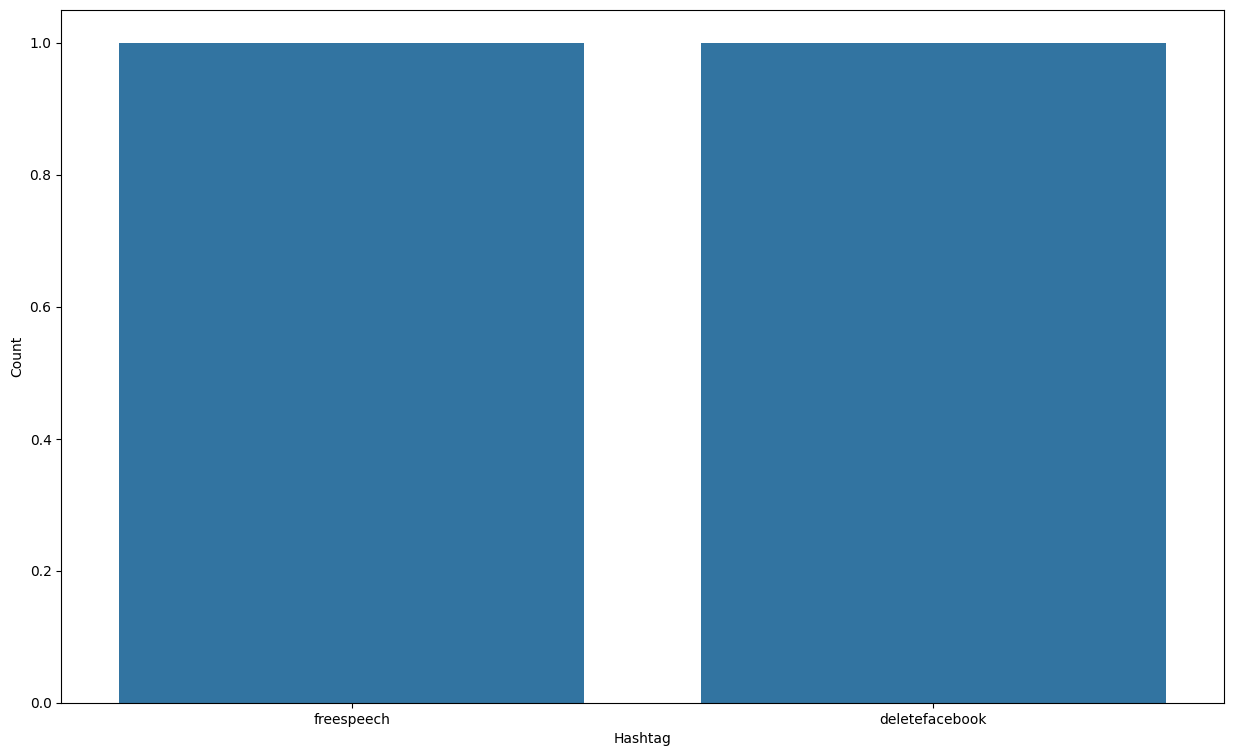

In [ ]:
# Select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
# Plot the bar chart
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_text'])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['clean_text'], random_state=42, test_size=0.25)

**MODEL TRAINING**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import f1_score

# Example of using 'micro' average
f1_micro = f1_score(y_test, pred, average='micro')

# Example of using 'macro' average
f1_macro = f1_score(y_test, pred, average='macro')

# Example of using 'weighted' average
f1_weighted = f1_score(y_test, pred, average='weighted')


In [ ]:
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# Extract hashtags from tweets
ht_positive = hashtag_extract(df['clean_text'])

# Unnest the list
ht_positive = sum(ht_positive, [])

# Frequency distribution of hashtags
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})

# Select top 10 hashtags
d = d.nlargest(columns='Count', n=10)

# Plot the bar chart
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import warnings
import plotly.express as px

# Load the data
df = pd.read_csv('elonmusk.csv')

# Display the first few rows of the dataframe
print(df.head())

# Check the datatype info
print(df.info())

# Remove pattern function
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

# Remove Twitter handles (@user)
df['clean_text'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

# Remove special characters, numbers, and punctuations
df['clean_text'] = df['clean_text'].str.replace("[^a-zA-Z#]", " ")

# Remove short words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))

# Tokenize the text
tokenized_text = df['clean_text'].apply(lambda x: x.split())

# Stem the words
stemmer = PorterStemmer()
tokenized_text = tokenized_text.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

# Combine words into a single sentence
for i in range(len(tokenized_text)):
    tokenized_text[i] = " ".join(tokenized_text[i])

df['clean_text'] = tokenized_text

# Visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_text']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequent words visualization for positive sentiment
all_words_positive = " ".join([sentence for sentence in df['clean_text'][df['user_verified']==True]])

wordcloud_positive = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_positive)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

# Frequent words visualization for negative sentiment
all_words_negative = " ".join([sentence for sentence in df['clean_text'][df['user_verified']==False]])

wordcloud_negative = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words_negative)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()



# Extract the hashtags
def hashtag_extract(tweets):
    hashtags = []
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

# Extract hashtags from tweets
ht_positive = hashtag_extract(df['clean_text'])

# Unnest list
ht_positive = sum(ht_positive, [])

# Frequency distribution of hashtags
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()), 'Count': list(freq.values())})

# Select top 10 hashtags
d = d.nlargest(columns='Count', n=10)

plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()
